Testing the ILX

In [5]:
from Instruments.ILX_LDT5910B import ILX_LDT5910B
from Instruments.Agilent_81635A import Agilent_81635A

# TEC
ILX = ILX_LDT5910B(0,1)
ILX.connect()

# Photodetector
PD = Agilent_81635A(0, 20, 2, 1)
PD.connect()

TEC output is on.
TEC output is off.


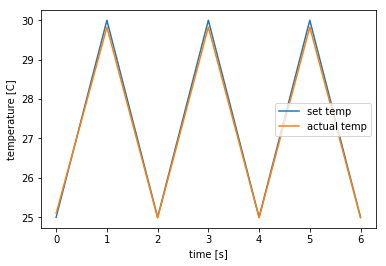

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

T = [25, 30, 25, 30, 25, 30,25]
x = []

# Vary the temperature using the TEC
ILX.output_on()
for i in T:
    ILX.set_temp(i)
    time.sleep(20)
    x.append(ILX.get_actual_temp())
ILX.output_off()

# Plot the results
plt.plot(range(len(T)),T,label="set temp")
plt.plot(range(len(T)),x,label="actual temp")
plt.xlabel("time [s]")
plt.ylabel("temperature [C]")
plt.legend()
plt.show()

TEC output is on.
TEC output is off.


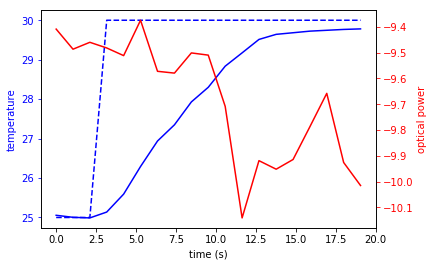

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time

time_sampling = 1
time_step = 2
total_time = 20
initial_temp = 25
temp_step = 5


t = []
T = []
P = []
setpoint = []

ILX.set_temp(initial_temp)
ILX.output_on()
time.sleep(5)

# Vary the temperature using the TEC
start_time = time.time()
while time.time() - start_time < total_time:
    current_time = time.time()
    time.sleep(time_sampling)
    
    t.append(current_time-start_time)
    T.append(ILX.get_actual_temp())
    setpoint.append(ILX.temp_setpoint)
    P.append(PD.measure_power())
    
    if current_time - start_time > time_step:
        ILX.set_temp(initial_temp + temp_step)
    
ILX.output_off()

# Plot
fig, ax1 = plt.subplots()
ax1.plot(t, T, 'b-',label="measured")
ax1.plot(t, setpoint, 'b--', label="target")
ax1.set_xlabel('time (s)')
ax1.set_ylabel('temperature', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(t, P, 'r-')
ax2.set_ylabel('optical power', color='r')
ax2.tick_params('y', colors='r')

In [7]:
P

[<bound method Agilent_81635A.measure_power of <Instruments.Agilent_81635A.Agilent_81635A object at 0x06088830>>,
 <bound method Agilent_81635A.measure_power of <Instruments.Agilent_81635A.Agilent_81635A object at 0x06088830>>,
 <bound method Agilent_81635A.measure_power of <Instruments.Agilent_81635A.Agilent_81635A object at 0x06088830>>,
 <bound method Agilent_81635A.measure_power of <Instruments.Agilent_81635A.Agilent_81635A object at 0x06088830>>,
 <bound method Agilent_81635A.measure_power of <Instruments.Agilent_81635A.Agilent_81635A object at 0x06088830>>,
 <bound method Agilent_81635A.measure_power of <Instruments.Agilent_81635A.Agilent_81635A object at 0x06088830>>,
 <bound method Agilent_81635A.measure_power of <Instruments.Agilent_81635A.Agilent_81635A object at 0x06088830>>,
 <bound method Agilent_81635A.measure_power of <Instruments.Agilent_81635A.Agilent_81635A object at 0x06088830>>,
 <bound method Agilent_81635A.measure_power of <Instruments.Agilent_81635A.Agilent_81635

In [5]:
ILX.set_temp(25)
ILX.output_on()

TEC output is on.


In [11]:
ILX.get_actual_temp()

25.0214

In [2]:
ILX.display("auto")

Display mode is now set to AUTO.


In [10]:
ILX.auto()

AUTO mode is on.


In [14]:
ILX.set_temp(27)